In [16]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import plotly.express as px

In [2]:
df = pd.read_csv('/home/nhut-minh-nguyen/Documents/DBM302m/Slot_3/21_05_2025___stack-overflow-developer-survey-2024/survey_results_public.csv', index_col=0)
df.head()

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
print(df.columns.values)


['MainBranch' 'Age' 'Employment' 'RemoteWork' 'Check' 'CodingActivities'
 'EdLevel' 'LearnCode' 'LearnCodeOnline' 'TechDoc' 'YearsCode'
 'YearsCodePro' 'DevType' 'OrgSize' 'PurchaseInfluence' 'BuyNewTool'
 'BuildvsBuy' 'TechEndorse' 'Country' 'Currency' 'CompTotal'
 'LanguageHaveWorkedWith' 'LanguageWantToWorkWith' 'LanguageAdmired'
 'DatabaseHaveWorkedWith' 'DatabaseWantToWorkWith' 'DatabaseAdmired'
 'PlatformHaveWorkedWith' 'PlatformWantToWorkWith' 'PlatformAdmired'
 'WebframeHaveWorkedWith' 'WebframeWantToWorkWith' 'WebframeAdmired'
 'EmbeddedHaveWorkedWith' 'EmbeddedWantToWorkWith' 'EmbeddedAdmired'
 'MiscTechHaveWorkedWith' 'MiscTechWantToWorkWith' 'MiscTechAdmired'
 'ToolsTechHaveWorkedWith' 'ToolsTechWantToWorkWith' 'ToolsTechAdmired'
 'NEWCollabToolsHaveWorkedWith' 'NEWCollabToolsWantToWorkWith'
 'NEWCollabToolsAdmired' 'OpSysPersonal use' 'OpSysProfessional use'
 'OfficeStackAsyncHaveWorkedWith' 'OfficeStackAsyncWantToWorkWith'
 'OfficeStackAsyncAdmired' 'OfficeStackSyncHaveWo

In [4]:
age_mapping = {
    "Under 18 years old" : 1,
    "18-24 years old" : 2,
    "25-34 years old" : 3,
    "35-44 years old" : 4,
    "45-54 years old" : 5,
    "55-64 years old" : 6,
    "65 years or older" : 7,
    "Prefer not to say" : 8
}
df['Age'] = df['Age'].map(age_mapping)

def preprocess_years_code_pro(value):
    if value == "Less than 1 year":
        return 0.5
    elif value == "More than 50 years":
        return 51
    else:
        return float(value)

df['YearsCodePro'] = df['YearsCodePro'].apply(preprocess_years_code_pro)

df = df.dropna(subset=['Age','YearsCodePro','CompTotal'])

correlation_matrix = df[['Age','CompTotal','YearsCodePro']].corr() 
print(correlation_matrix)

                   Age  CompTotal  YearsCodePro
Age           1.000000   0.002750      0.819048
CompTotal     0.002750   1.000000      0.025366
YearsCodePro  0.819048   0.025366      1.000000


/tmp/ipykernel_4654/3302510229.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


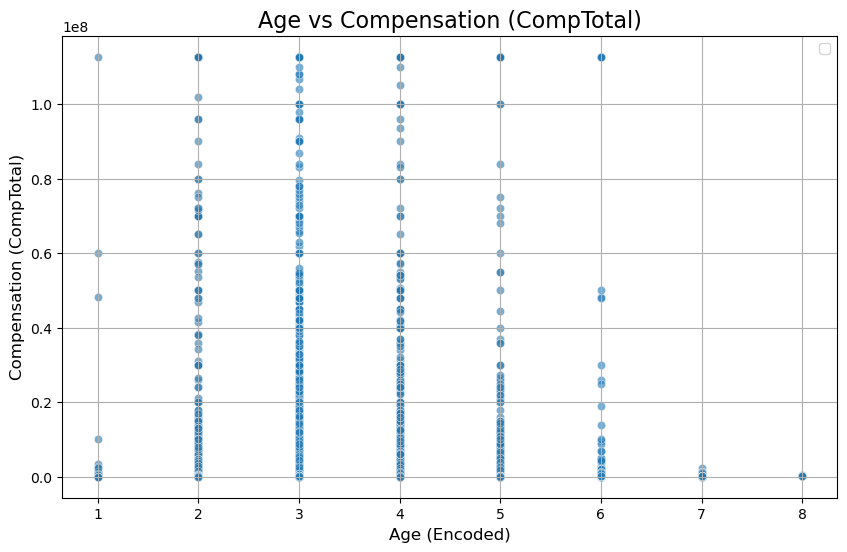

/tmp/ipykernel_4654/3302510229.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


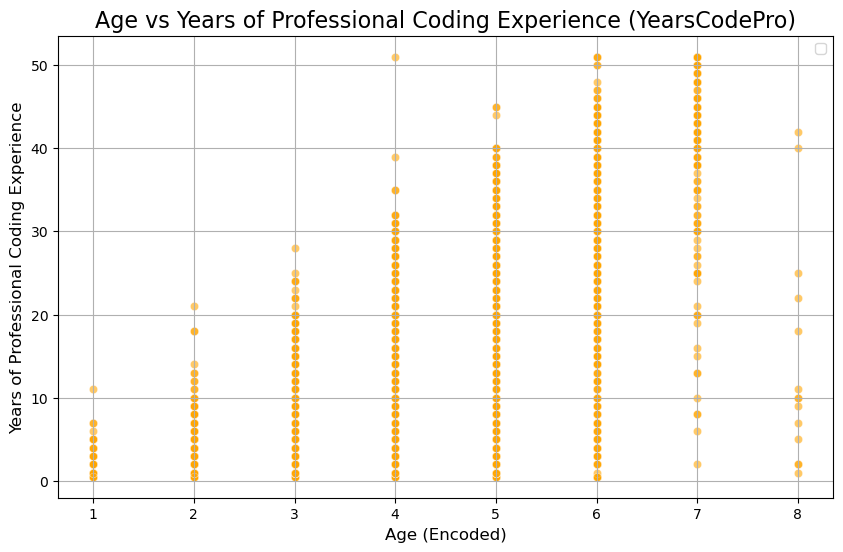

In [5]:
comp_total_cap = df['CompTotal'].quantile(0.99)
df['CompTotal'] = df['CompTotal'].clip(upper=comp_total_cap)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='CompTotal', alpha=0.6)
plt.title('Age vs Compensation (CompTotal)', fontsize=16)
plt.xlabel('Age (Encoded)', fontsize=12)
plt.ylabel('Compensation (CompTotal)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='YearsCodePro', alpha=0.6, color='orange')
plt.title('Age vs Years of Professional Coding Experience (YearsCodePro)', fontsize=16)
plt.xlabel('Age (Encoded)', fontsize=12)
plt.ylabel('Years of Professional Coding Experience', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

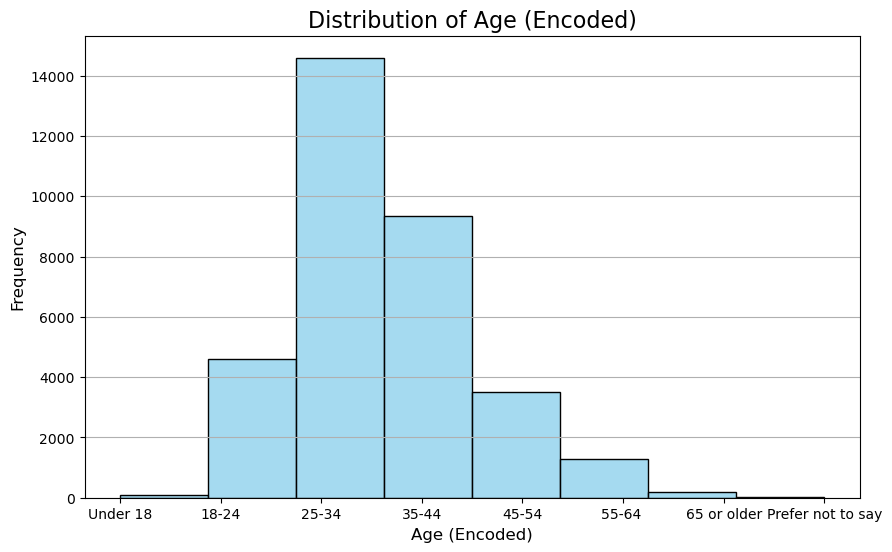

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=8, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Age (Encoded)', fontsize=16)
plt.xlabel('Age (Encoded)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(ticks=[1, 2, 3, 4, 5, 6,7,8], labels=["Under 18", 
                                                 "18-24", 
                                                 "25-34", 
                                                 "35-44", 
                                                 "45-54", 
                                                 "55-64 ", 
                                                 "65 or older", 
                                                 "Prefer not to say"]
          )
plt.grid(axis='y')
plt.show()

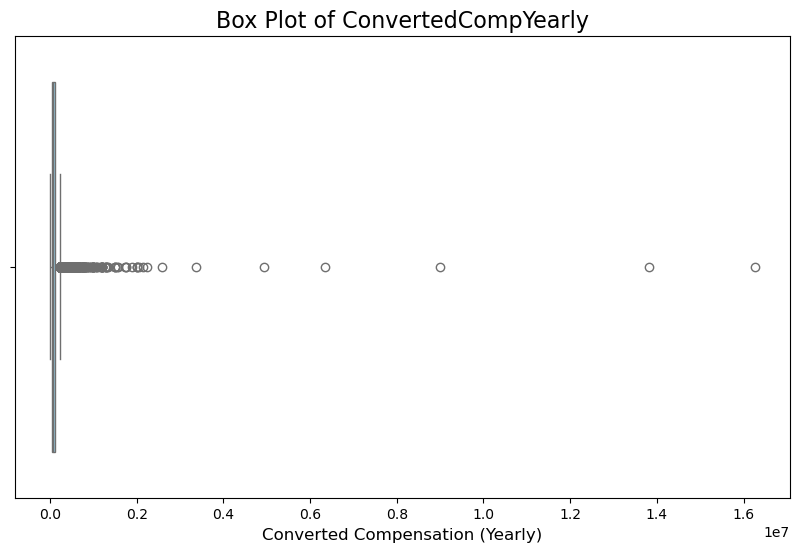

In [7]:
df = df.dropna(subset=['ConvertedCompYearly'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ConvertedCompYearly', color='skyblue')
plt.title('Box Plot of ConvertedCompYearly', fontsize=16)
plt.xlabel('Converted Compensation (Yearly)', fontsize=12)
plt.show()

In [8]:
df = df.dropna(subset=['Age', 'WorkExp'])

correlation = df['Age'].corr(df['WorkExp'])
print(f"Correlation between Age and WorkExp: {correlation:.2f}")

Correlation between Age and WorkExp: 0.84


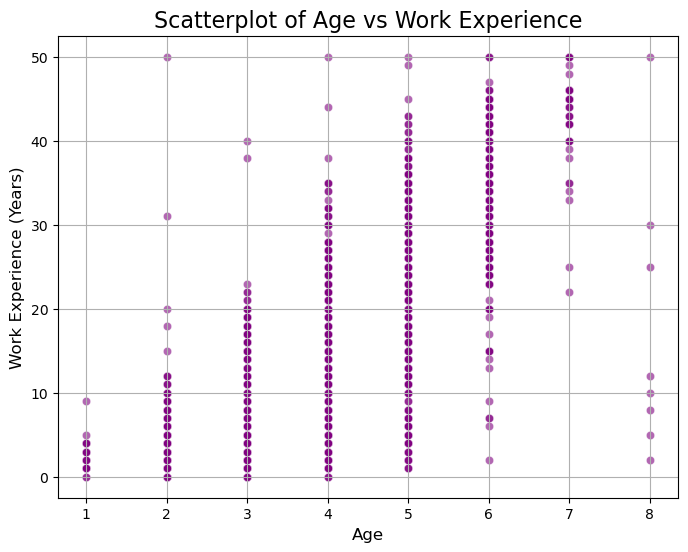

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='WorkExp', alpha=0.6, color='purple')
plt.title('Scatterplot of Age vs Work Experience', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Work Experience (Years)', fontsize=12)
plt.grid(True)
plt.show()

/tmp/ipykernel_4654/2743038088.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Count', y='Language', palette='viridis')


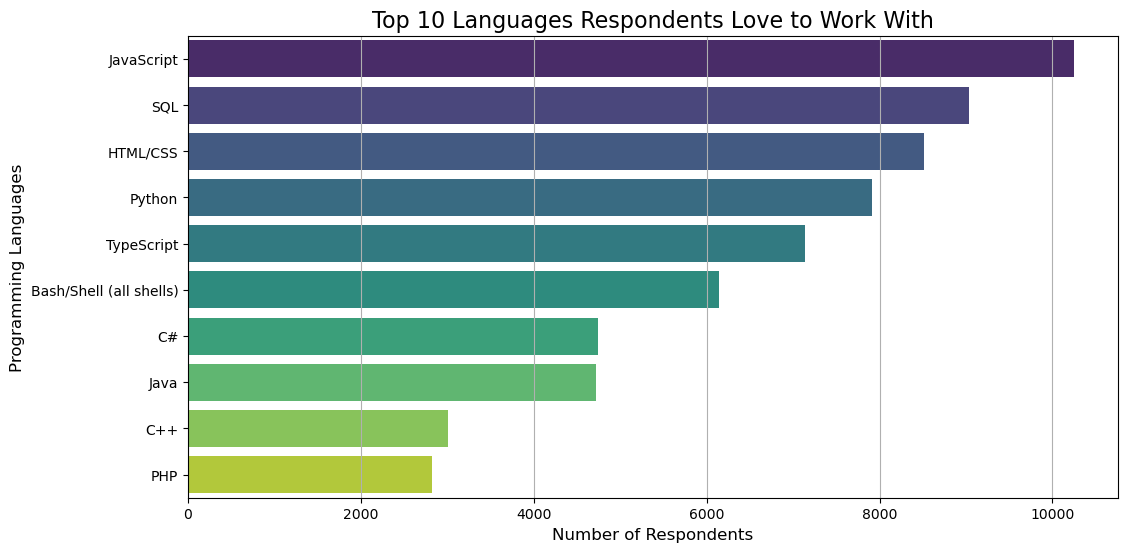

In [10]:
df = df.dropna(subset=['LanguageHaveWorkedWith'])

languages_series = df['LanguageHaveWorkedWith'].str.split(';').explode()

language_counts = Counter(languages_series)

top_languages = language_counts.most_common(10)

languages, counts = zip(*top_languages)
data = pd.DataFrame({'Language': languages, 'Count': counts})

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Count', y='Language', palette='viridis')
plt.title('Top 10 Languages Respondents Love to Work With', fontsize=16)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Programming Languages', fontsize=12)
plt.grid(axis='x')
plt.show()

/tmp/ipykernel_4654/2571642537.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_2, x='Count', y='Language', palette='viridis')


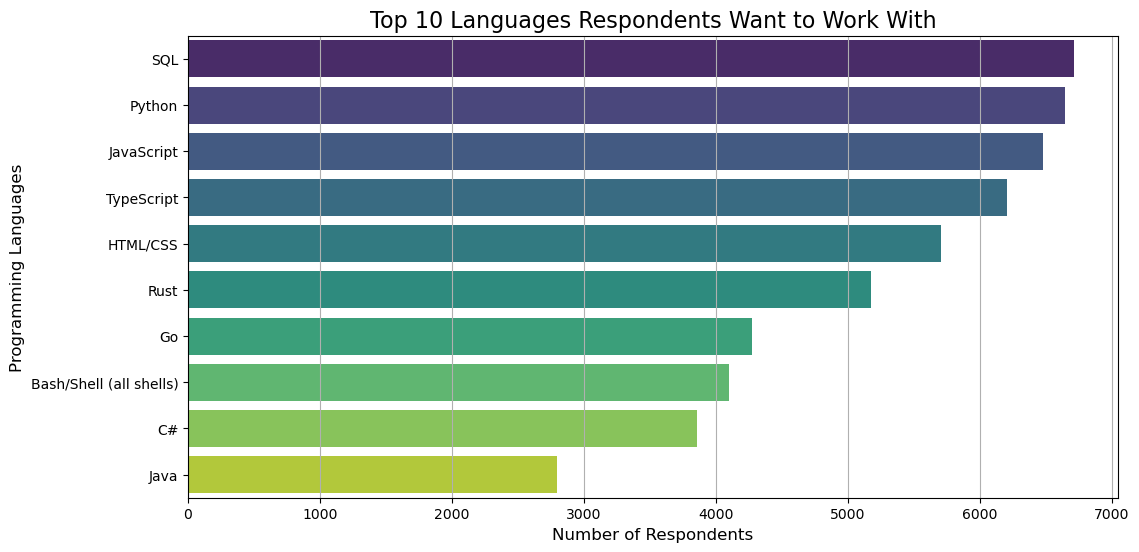

In [11]:
df = df.dropna(subset=['LanguageWantToWorkWith'])

languages_series_2 = df['LanguageWantToWorkWith'].str.split(';').explode()

language_counts_2 = Counter(languages_series_2)

top_languages_2 = language_counts_2.most_common(10)

languages, counts = zip(*top_languages_2)
data_2 = pd.DataFrame({'Language': languages, 'Count': counts})

plt.figure(figsize=(12, 6))
sns.barplot(data=data_2, x='Count', y='Language', palette='viridis')
plt.title('Top 10 Languages Respondents Want to Work With', fontsize=16)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Programming Languages', fontsize=12)
plt.grid(axis='x')
plt.show()

/tmp/ipykernel_4654/4212150683.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_1, x='Database', y='Count', palette='viridis')


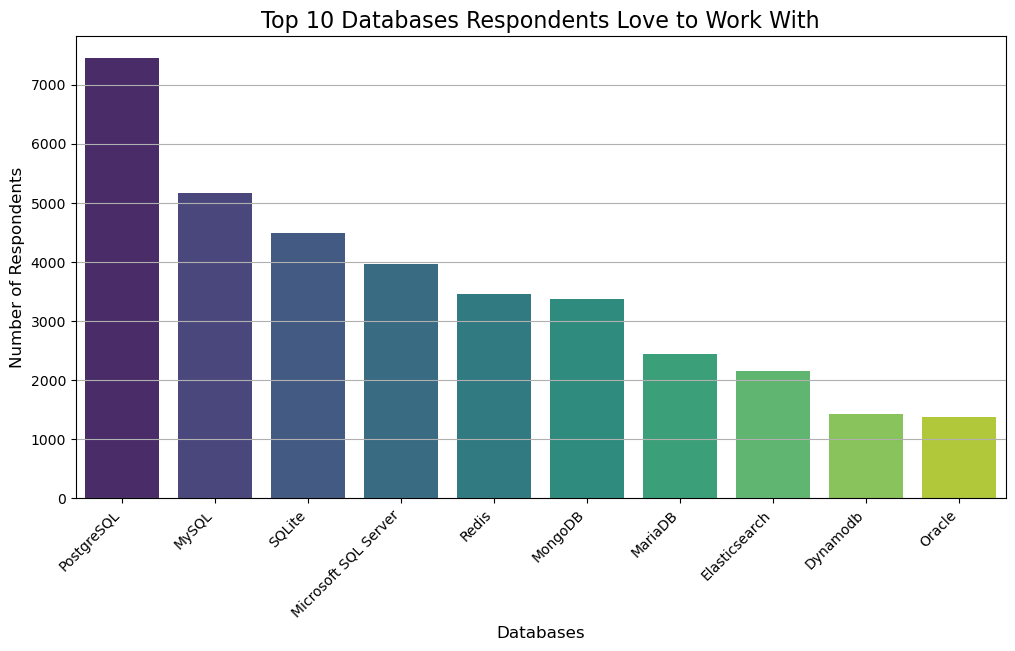

In [12]:
df = df.dropna(subset=['DatabaseHaveWorkedWith'])

database_series_1 = df['DatabaseHaveWorkedWith'].str.split(';').explode()

database_counts_1 = Counter(database_series_1)

top_database_1 = database_counts_1.most_common(10)

databases, counts = zip(*top_database_1)
data_1 = pd.DataFrame({'Database': databases, 'Count': counts})

plt.figure(figsize=(12, 6))
sns.barplot(data=data_1, x='Database', y='Count', palette='viridis')
plt.title('Top 10 Databases Respondents Love to Work With', fontsize=16)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xlabel('Databases', fontsize=12)
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y')
plt.show()


/tmp/ipykernel_4654/1873028268.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_2, x='Database', y='Count', palette='viridis')


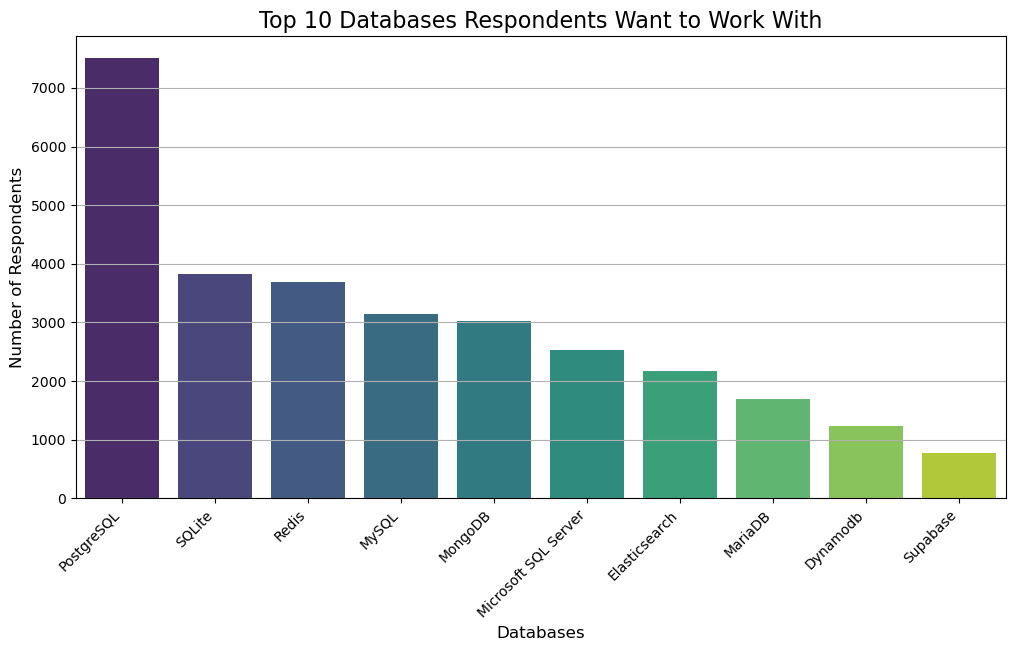

In [13]:
df = df.dropna(subset=['DatabaseWantToWorkWith'])

database_series_2 = df['DatabaseWantToWorkWith'].str.split(';').explode()

database_counts_2 = Counter(database_series_2)

top_database_2 = database_counts_2.most_common(10)

databases, counts = zip(*top_database_2)
data_2 = pd.DataFrame({'Database': databases, 'Count': counts})

plt.figure(figsize=(12, 6))
sns.barplot(data=data_2, x='Database', y='Count', palette='viridis')
plt.title('Top 10 Databases Respondents Want to Work With', fontsize=16)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xlabel('Databases', fontsize=12)
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y')
plt.show()


In [18]:
df = df.dropna(subset=['WebframeHaveWorkedWith'])

webframes_series = df['WebframeHaveWorkedWith'].str.split(';').explode()

webframe_counts = webframes_series.value_counts().head(10)

bubble_data = pd.DataFrame({'Web Framework': webframe_counts.index, 'Count': webframe_counts.values})

fig = px.scatter(
    bubble_data,
    x='Web Framework',
    y='Count',
    size='Count',
    color='Web Framework',
    title='Top 10 Web Frameworks Respondents Love to Work With',
    labels={'Count': 'Number of Respondents'},
    size_max=60
)

fig.update_layout(xaxis_title='Web Frameworks', yaxis_title='Number of Respondents')
fig.show()


In [19]:
df = df.dropna(subset=['WebframeWantToWorkWith'])

webframes_want_series = df['WebframeWantToWorkWith'].str.split(';').explode()

webframe_want_counts = webframes_want_series.value_counts().head(10)

bubble_data_want = pd.DataFrame({'Web Framework': webframe_want_counts.index, 'Count': webframe_want_counts.values})

fig = px.scatter(
    bubble_data_want,
    x='Web Framework',
    y='Count',
    size='Count',
    color='Web Framework',
    title='Top 10 Web Frameworks Respondents Want to Work With',
    labels={'Count': 'Number of Respondents'},
    size_max=60
)

fig.update_layout(xaxis_title='Web Frameworks', yaxis_title='Number of Respondents')
fig.show()


In [20]:
df = df.dropna(subset=['Country'])

country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

fig = px.choropleth(
    country_counts,
    locations='Country',  
    locationmode='country names', 
    color='Count',
    hover_name='Country',  
    color_continuous_scale=px.colors.sequential.Plasma,  
    title='Respondents by Country',
    labels={'Count': 'Number of Respondents'},
    projection='natural earth'
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black")
fig.update_layout(title_x=0.5) 
fig.show()

In [21]:
df = df.dropna(subset=['Employment', 'Frustration'])

df['Employment'] = df['Employment'].str.split(';')
df['Frustration'] = df['Frustration'].str.split(';')

df = df.explode('Employment')
df = df.explode('Frustration')

employment_frustration_counts = df.groupby(['Employment', 'Frustration']).size().reset_index(name='Count')

pivot_data = employment_frustration_counts.pivot(index='Employment', columns='Frustration', values='Count').fillna(0)

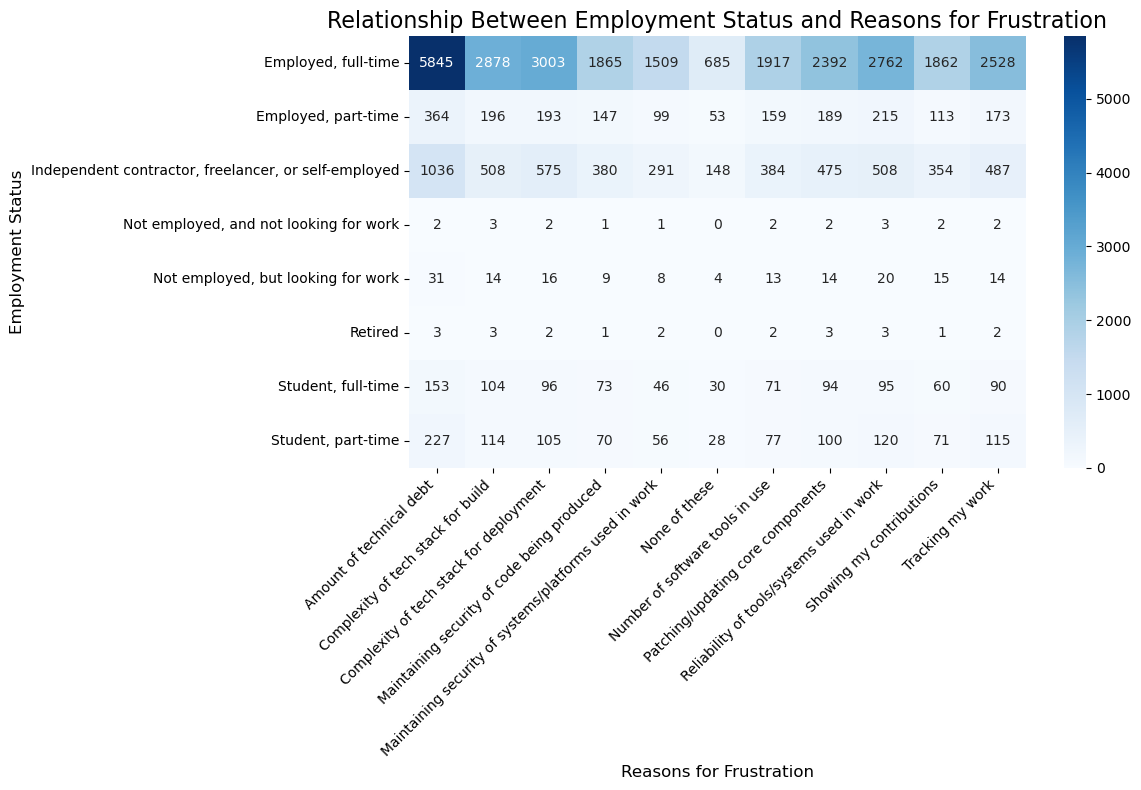

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='Blues', cbar=True)
plt.title('Relationship Between Employment Status and Reasons for Frustration', fontsize=16)
plt.xlabel('Reasons for Frustration', fontsize=12)
plt.ylabel('Employment Status', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

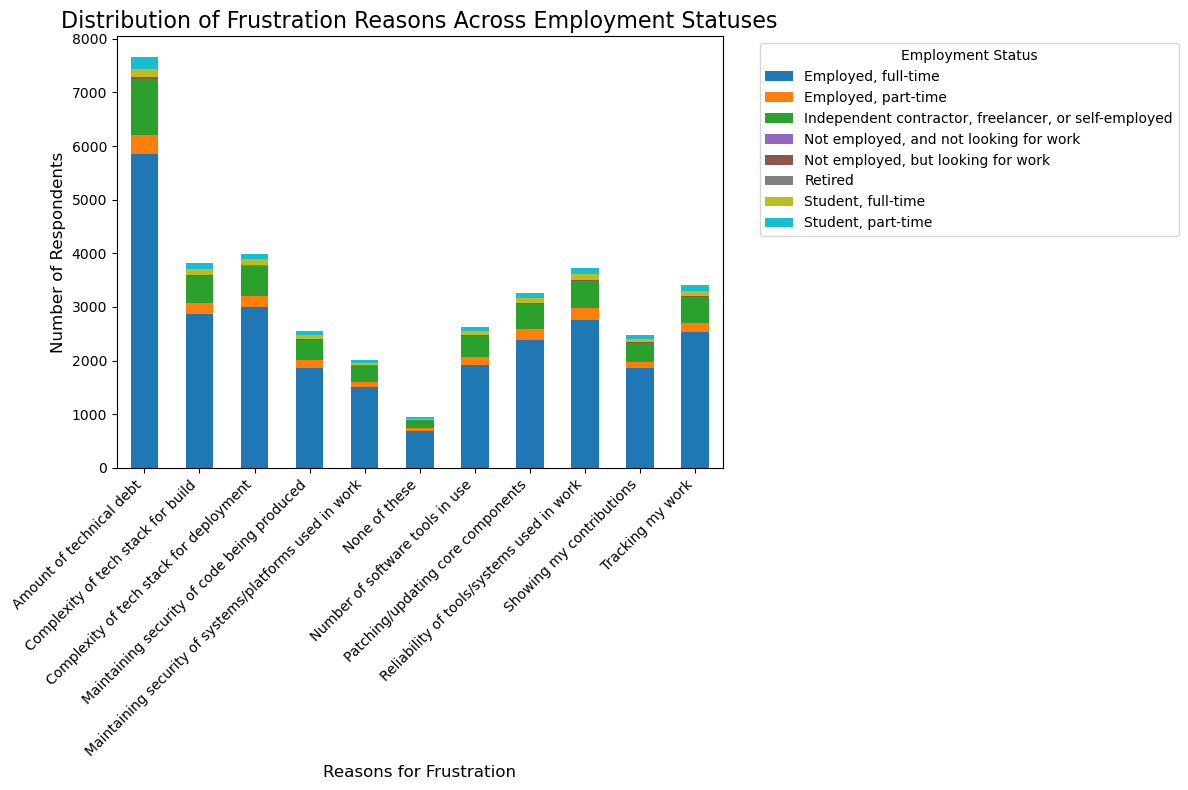

In [23]:
stacked_data = employment_frustration_counts.pivot(index='Frustration', columns='Employment', values='Count').fillna(0)

stacked_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab10')
plt.title('Distribution of Frustration Reasons Across Employment Statuses', fontsize=16)
plt.xlabel('Reasons for Frustration', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()